<a href="https://colab.research.google.com/github/asaadkhan21/Machine_Learning_Lab/blob/main/Lab_4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('shop data.csv')
dataset.head()

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [3]:
x=dataset.iloc[:,:-1]
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [4]:
y=dataset.iloc[:,4].values
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'no'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x=x.apply(label.fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=tree.DecisionTreeClassifier()
model=model.fit(x,y)

In [7]:
prediction=model.predict([[1,0	,1,	1]])
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype=object)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,model.predict(x)))
print(confusion_matrix(y,model.predict(x)))

              precision    recall  f1-score   support

          no       0.86      1.00      0.92         6
         yes       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

[[6 0]
 [1 8]]


In [9]:
cm=confusion_matrix(y,model.predict(x))
cm_df=pd.DataFrame(cm,index=['No','Yes'],columns=['No','Yes'])
cm_df

,No,Yes
No,6,0
Yes,1,8


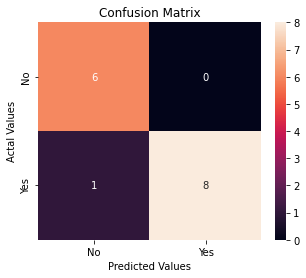

In [10]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
